# Import the Required Libraries

In [82]:

import pandas as pd
from scipy.stats import mannwhitneyu
from scipy.stats import chi2_contingency
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme(context = 'notebook', palette = sns.color_palette("Set2"))
import warnings
warnings.filterwarnings("ignore")

import ipywidgets as widgets
from IPython.display import display

%matplotlib inline

# 1. Import the Datasets

In [2]:
# Loading the Datasets

df_heart = pd.read_csv('heart.csv')
df_bmi = pd.read_csv('bmi_dataset.csv')

In [3]:
# Merge the two datasets

df = pd.concat([df_heart, df_bmi.drop("Sex", axis=1)], axis=1)

In [ ]:
# Create Index Category Column 

df["Index_Cat"] = df["Index"].map({0:"Extremely Weak", 1:"Weak",
                                2:"Normal", 3:"Overweight",
                                4:"Obesity", 5:"Extreme Obesity"})

In [ ]:
# Calculate BMI

df["BMI"] = df.apply(lambda x: int((x["Weight"] / (x["Height"])**2) *10000), axis=1)

# 2. Dataset Description

Exploratory Data Analysis

In [100]:
samples, features = df.shape
print('Number Of Samples: ', samples)
print('Number Of Features: ', features)

Number Of Samples:  918
Number Of Features:  17


In [101]:
# Display the first few rows of the DataFrame
df.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease,Height,Weight,Index,Index_Cat,BMI
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0,174,96,4,Obesity,31
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1,185,110,4,Obesity,32
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0,149,61,3,Overweight,27
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1,195,104,3,Overweight,27
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0,189,104,3,Overweight,29


In [78]:
# Reviewing data types

df.info()
print('The newly merged dataset has 15 columns, with no NA values, five columns have object dtype, one is a float, the others are numeric.')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 17 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  HeartDisease    918 non-null    int64  
 12  Height          918 non-null    int64  
 13  Weight          918 non-null    int64  
 14  Index           918 non-null    int64  
 15  Index_Cat       918 non-null    object 
 16  BMI             918 non-null    int64  
dtypes: float64(1), int64(10), object(6)

In [112]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,918.0,53.510893,9.432617,28.0,47.00,54.0,60.0,77.0
RestingBP,918.0,132.396514,18.514154,0.0,120.00,130.0,140.0,200.0
Cholesterol,918.0,198.799564,109.384145,0.0,173.25,223.0,267.0,603.0
FastingBS,918.0,0.233115,0.423046,0.0,0.00,0.0,0.0,1.0
MaxHR,918.0,136.809368,25.460334,60.0,120.00,138.0,156.0,202.0
Oldpeak,918.0,0.887364,1.066570,-2.6,0.00,0.6,1.5,6.2
HeartDisease,918.0,0.553377,0.497414,0.0,0.00,1.0,1.0,1.0
Height,918.0,170.886710,16.249829,140.0,157.00,174.0,185.0,199.0
Weight,918.0,101.702614,31.640838,50.0,79.00,96.0,130.0,160.0
Index,918.0,3.569717,1.550684,0.0,3.00,4.0,5.0,5.0


In [111]:
# Use describe().T to get the transpose of the summary statistics (Age, MaxHR, Weight, BMI)
summary_stats = df.describe().T

#Print the mean Age, MaxHR, Weight, BMI
mean_age = summary_stats.loc['Age', 'mean']
mean_maxHR = summary_stats.loc['MaxHR', 'mean']
mean_weight = summary_stats.loc['Weight', 'mean']
mean_bmi = summary_stats.loc['BMI', 'mean']

print(f'Mean Age: {mean_age}')
print(f'Mean MaxHR: {mean_maxHR}')
print(f'Mean Weight: {mean_weight}')
print(f'Mean BMI: {mean_bmi}')

Mean Age: 53.510893246187365
Mean MaxHR: 136.80936819172112
Mean Weight: 101.70261437908496
Mean BMI: 35.58169934640523


# 3. Preprocessing and Cleaning Data

In [9]:
# Check the null values present in the DataFrame
df.isnull().sum()

Age               0
Sex               0
ChestPainType     0
RestingBP         0
Cholesterol       0
FastingBS         0
RestingECG        0
MaxHR             0
ExerciseAngina    0
Oldpeak           0
ST_Slope          0
HeartDisease      0
Height            0
Weight            0
Index             0
dtype: int64

In [10]:
# Check for the number of duplicates

df.duplicated().sum()

0

In [12]:
# Display the shape of the DataFrame
df.shape

(918, 15)

# 4. Data Visualization and Analysis

Exploring Categorical Features

In [24]:
# Select Categorical Columns

categorical_columns = ["Sex", "ChestPainType", "RestingECG", "ExerciseAngina", "ST_Slope", "Index_Cat"]

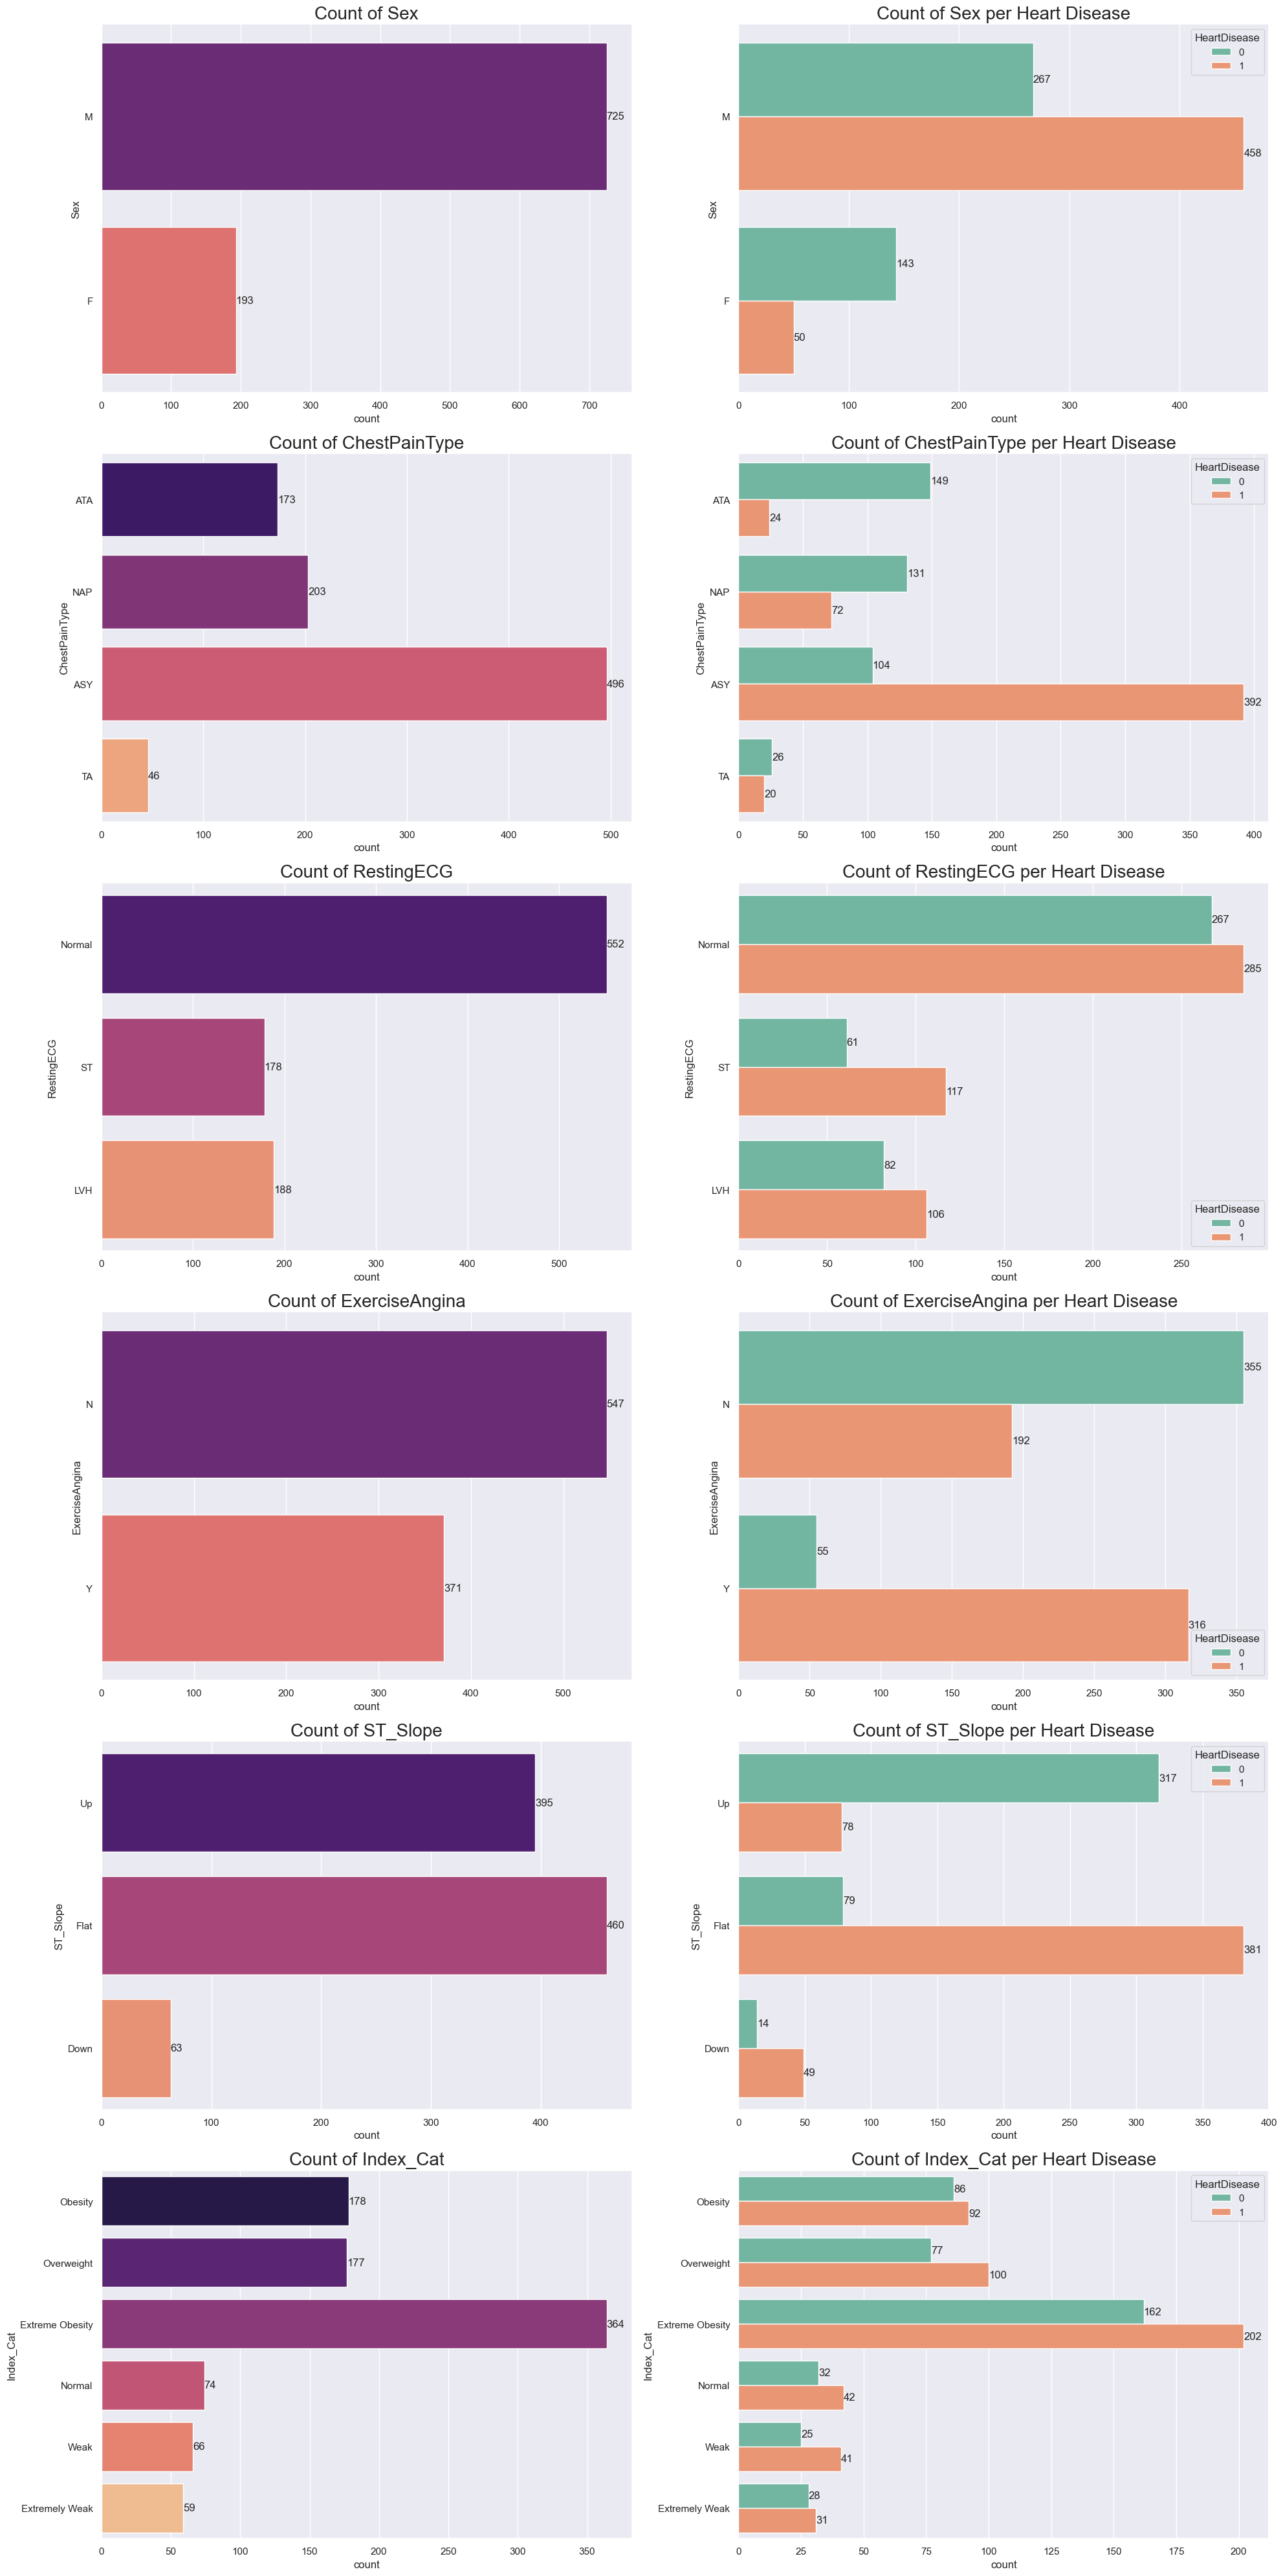

In [99]:
# Create subplots 

fig, axes = plt.subplots(6,2, figsize=(20,40))
sns.set_style('darkgrid')
idx = 0

# Loop through numerical columns
for col in categorical_columns:
    # Count plot
    sns.countplot(data=df, y=col, palette='magma', orient='h',
                  ax=axes[idx][0]).set_title(f'Count of {col}', fontsize='20')
    for container in axes[idx][0].containers:
        axes[idx][0].bar_label(container)
    sns.countplot(data=df, y=col, palette = sns.color_palette("Set2"), orient='h',  hue='HeartDisease',
                  ax=axes[idx][1]).set_title(f'Count of {col} per Heart Disease', fontsize='20')
    for container in axes[idx][1].containers:
        axes[idx][1].bar_label(container)
    idx +=1

# Adjust layout
plt.tight_layout()
plt.show()


In [88]:
print('The following have an impact on heart disease: Males more than females, Asymptomatic (ASY) chest pain, and those with exercise induced angina')
print('It is key to note that the dataset is unbalanced, with more males than females.')

The following have an impact on heart disease: Males more than females, Asymptomatic (ASY) chest pain, and those with exercise induced angina
It is key to note that the dataset is unbalanced, with more males than females.


Exploring Numeric Features

In [26]:
# Define numerical columns

numerical_columns = ["Age", "RestingBP", "Cholesterol", "FastingBS", "MaxHR", "Height", "Weight", "BMI"]

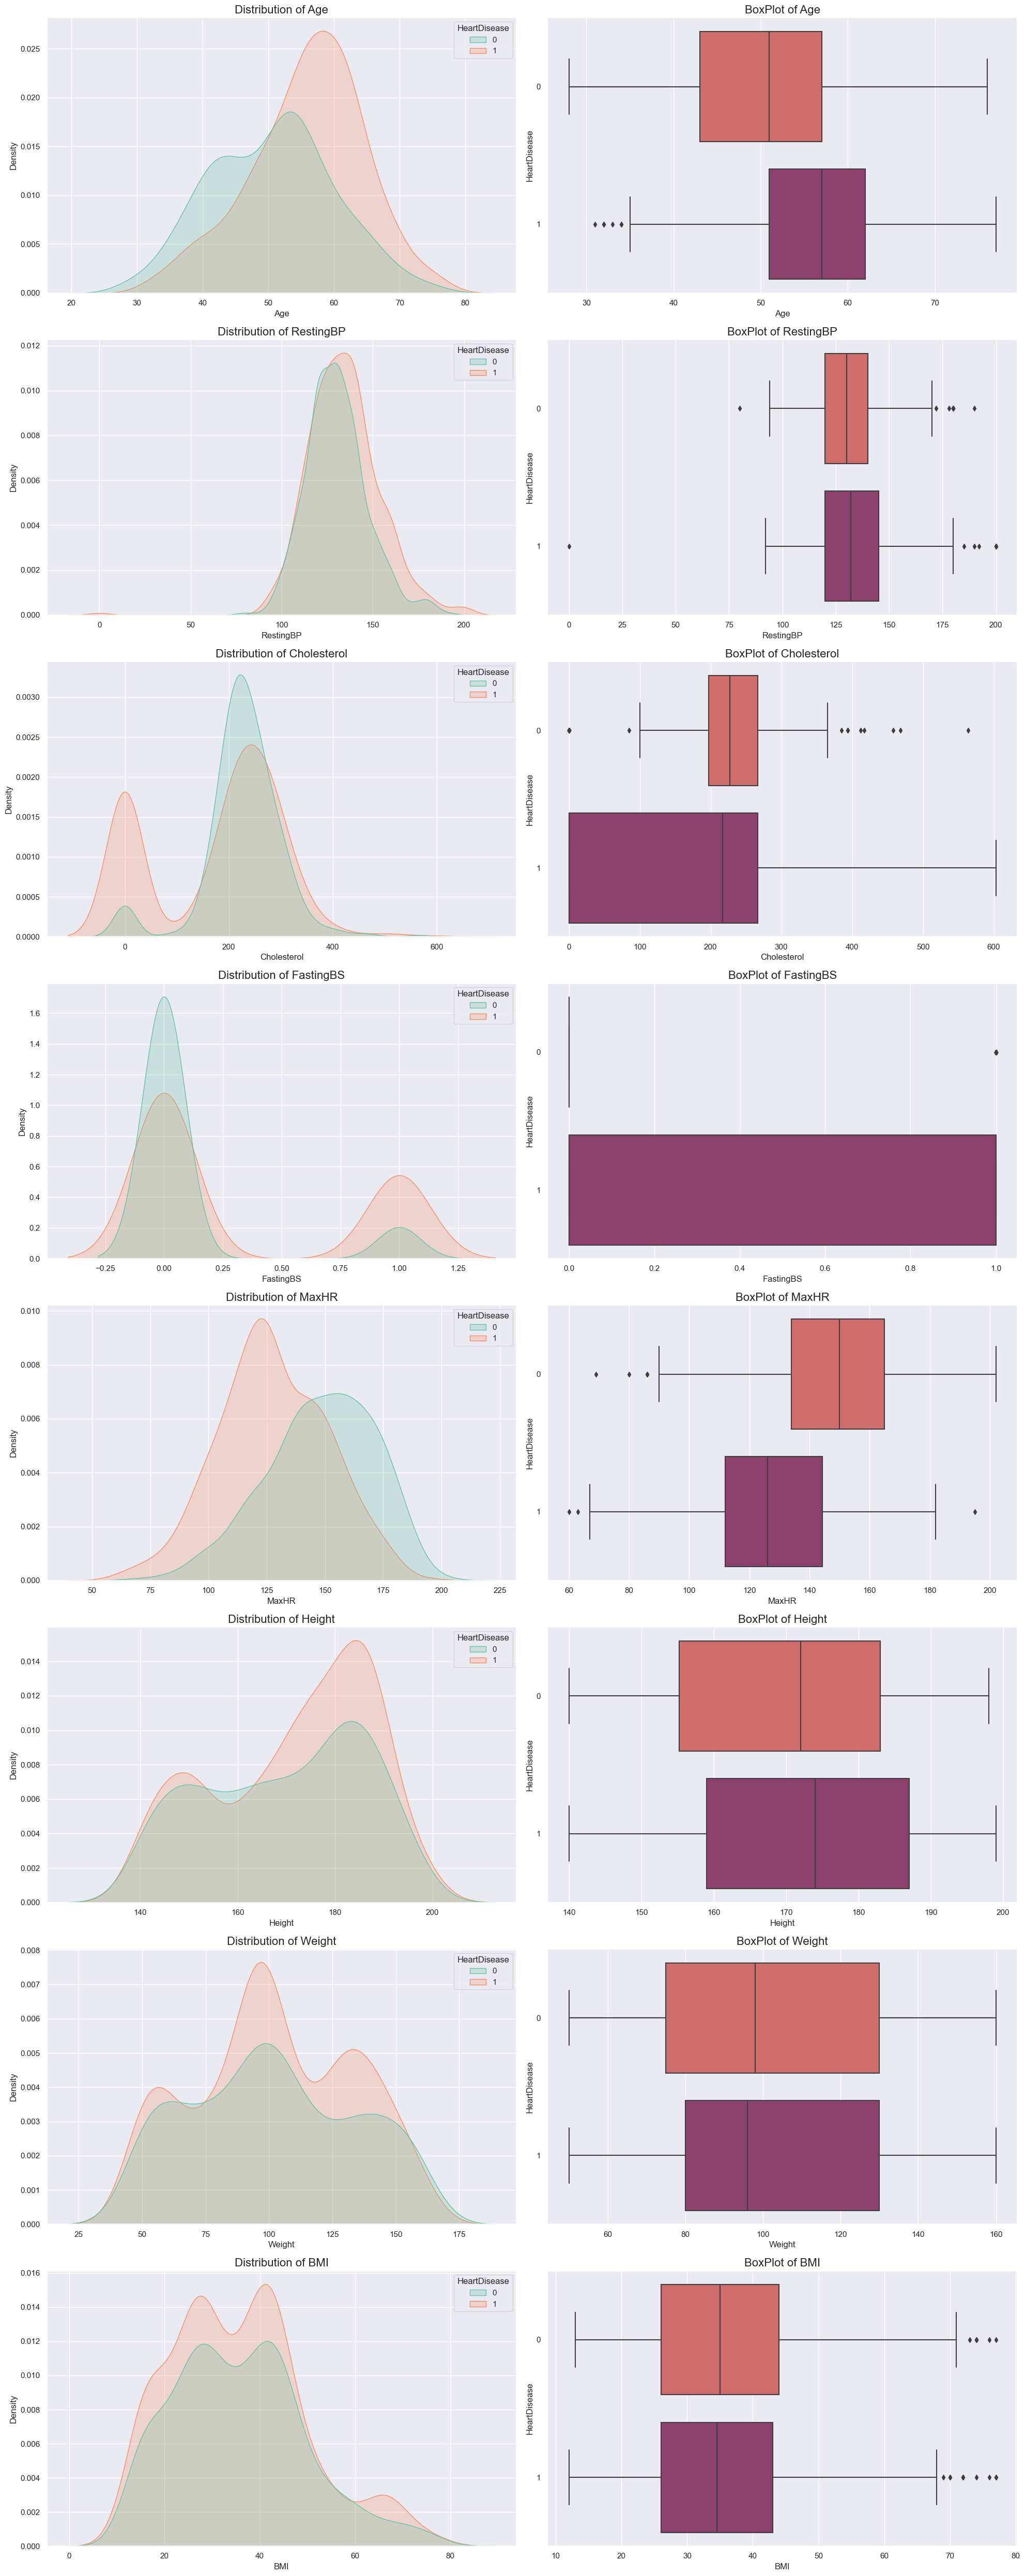

In [98]:
# Create subplots

fig, axes = plt.subplots(8,2, figsize=(20,50))
sns.set_style('darkgrid')
idx = 0

# Loop through numerical columns
for col in (numerical_columns):
    # KDE plot
    sns.kdeplot(data=df, x=col, palette = sns.color_palette("Set2"),fill=True , hue='HeartDisease',
                ax=axes[idx][0]).set_title(f'Distribution of {col}', fontsize='16')
    # Box plot
    sns.boxplot(data=df, x=col, palette='flare' , y='HeartDisease', orient='h',
                ax=axes[idx][1]).set_title(f'BoxPlot of {col}', fontsize='16')
    idx +=1

# Adjust layout
plt.tight_layout()
plt.show()

In [113]:
print(f"As expected, older people are seen to be more likely to have heart disease than younger people. The Mean age of those without heart disease is {df[df.HeartDisease == 0]['Age'].mean():.2f}, and the mean age for those with Heart disease is older, {df[df.HeartDisease == 1]['Age'].mean():.2f}")

As expected, older people are seen to be more likely to have heart disease than younger people. The Mean age of those without heart disease is 50.55, and the mean age for those with Heart disease is older, 55.90


Bivariate Visualizations

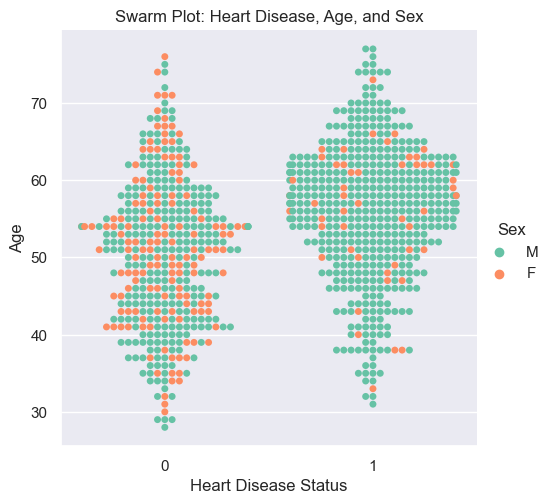

In [90]:
# Use seaborn to create a swarm plot

sns.catplot(data=df, x="HeartDisease", y="Age", kind="swarm", hue="Sex")

# Adding labels and title
plt.xlabel('Heart Disease Status')
plt.ylabel('Age')
plt.title('Swarm Plot: Heart Disease, Age, and Sex');

In [89]:
print('Older males indicate higher chances of heart disease than their female counterparts')

Older males indicate higher chances of heart disease than their female counterparts


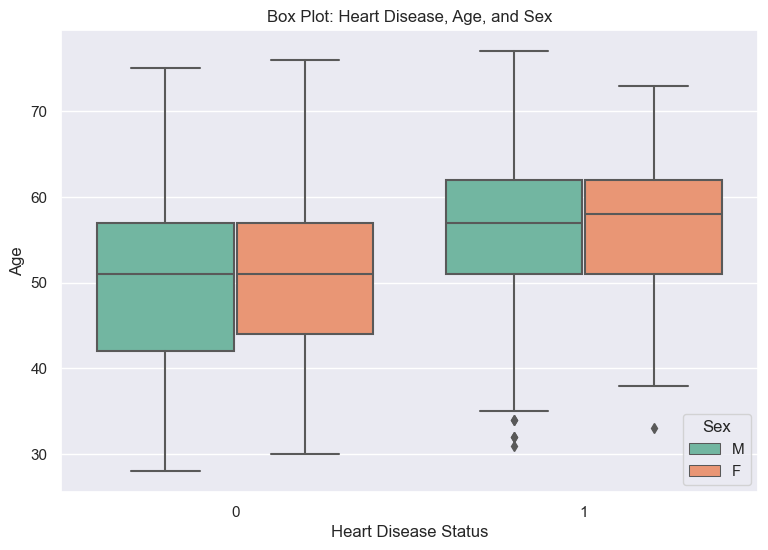

In [91]:
# Create a box plot using seaborn

fig = plt.figure(figsize=(9,6))
sns.boxplot(data = df, y="Age", x="HeartDisease", hue = "Sex")

# Adding labels and title
plt.xlabel('Heart Disease Status')
plt.ylabel('Age')
plt.title('Box Plot: Heart Disease, Age, and Sex');

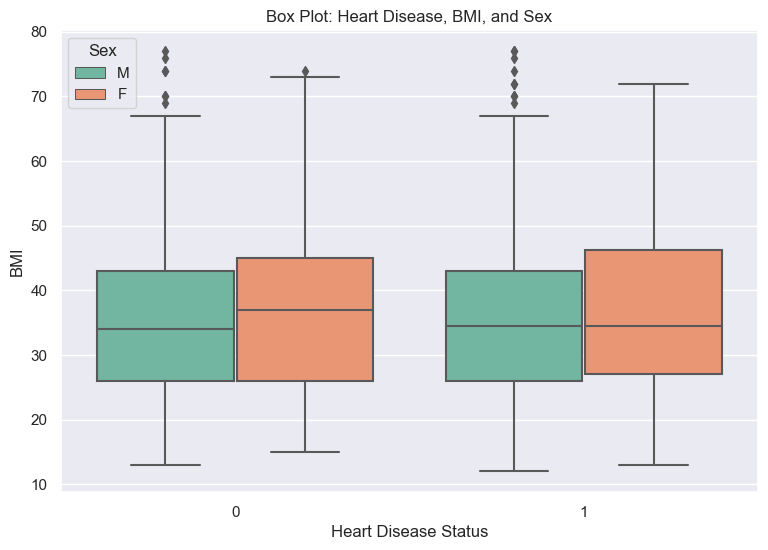

In [94]:
# Create a box plot using seaborn
fig = plt.figure(figsize=(9,6))
sns.boxplot(data = df, y="BMI", x="HeartDisease", hue = "Sex")

# Adding labels and title
plt.xlabel('Heart Disease Status')
plt.ylabel('BMI')
plt.title('Box Plot: Heart Disease, BMI, and Sex');

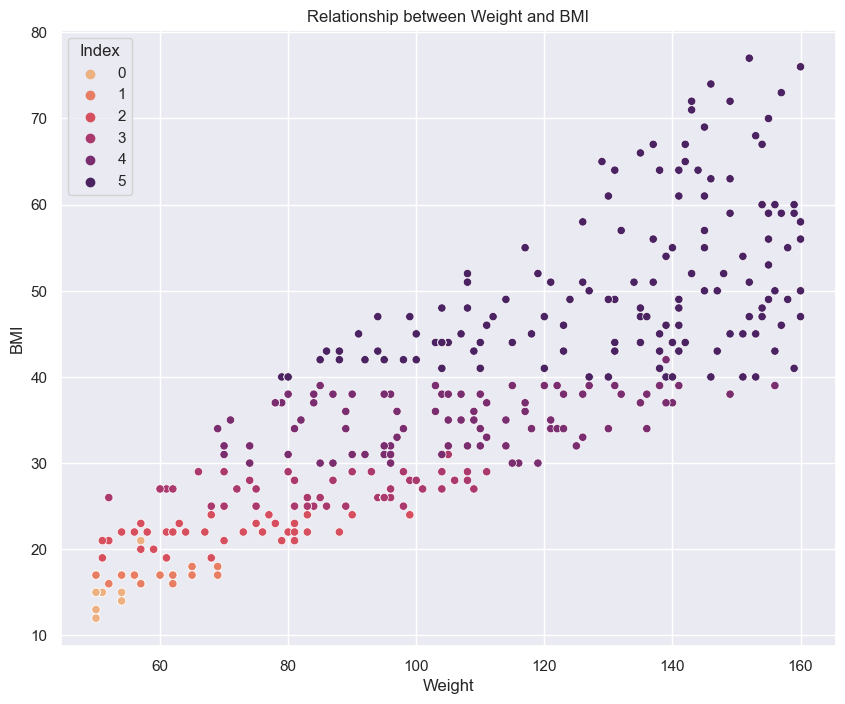

In [95]:
# Create a scatter plot using seaborn 

plt.figure(figsize=(10,8))
sns.scatterplot(x="Weight", y="BMI", hue="Index", data=df, palette='flare')
plt.title("Relationship between Weight and BMI")

# Adding labels and title
plt.xlabel('Weight')
plt.ylabel('BMI')
plt.title('Relationship between Weight and BMI');

In [114]:
print('The scatter plot indicates a positive correlation between weight and BMI, as weight increases, BMI also tends to increase.')

The scatter plot indicates a positive correlation between weight and BMI, as weight increases, BMI also tends to increase.


Correlation Between The Features

In [34]:
#Select the numerical columns

numeric_data = df.select_dtypes(include="number")
cor = numeric_data.corr()

Spearman correlation matrix


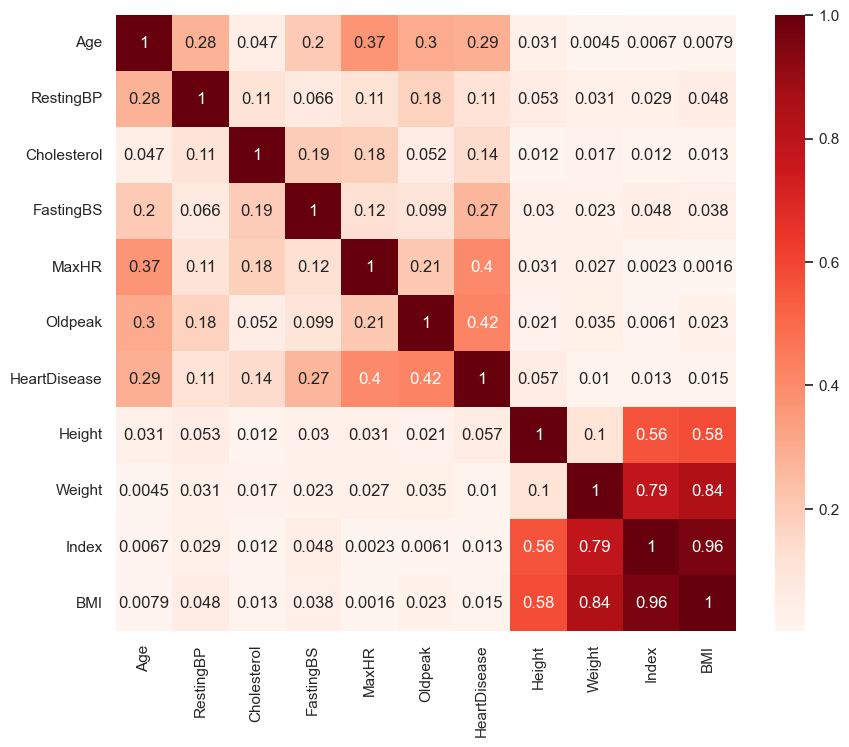

The correlation coefficient of 0.79 indicates a strong positive correlation between weight and BMI and height and BMI as expected, and a somewhat positive correlation between Heart Disease and MaxHR, Oldpeak, and FastingBS, however, there is potenitally non-linear correlation between the other different variables, including Heart Disease and BMI.


<Figure size 640x480 with 0 Axes>

In [119]:
# Plot the Spearman correlation matrix

plt.figure(figsize=(10,8))
cor = numeric_data.corr(method="spearman").abs()
sns.heatmap(cor, annot=True, cmap=plt.cm.Reds)
print("Spearman correlation matrix")
plt.show()
plt.tight_layout()

print('The correlation coefficient of 0.79 indicates a strong positive correlation between weight and BMI and height and BMI as expected, and a somewhat positive correlation between Heart Disease and MaxHR, Oldpeak, and FastingBS, however, there is potenitally non-linear correlation between the other different variables, including Heart Disease and BMI.')

Average BMI and Average weight comparisions with Heart Disease

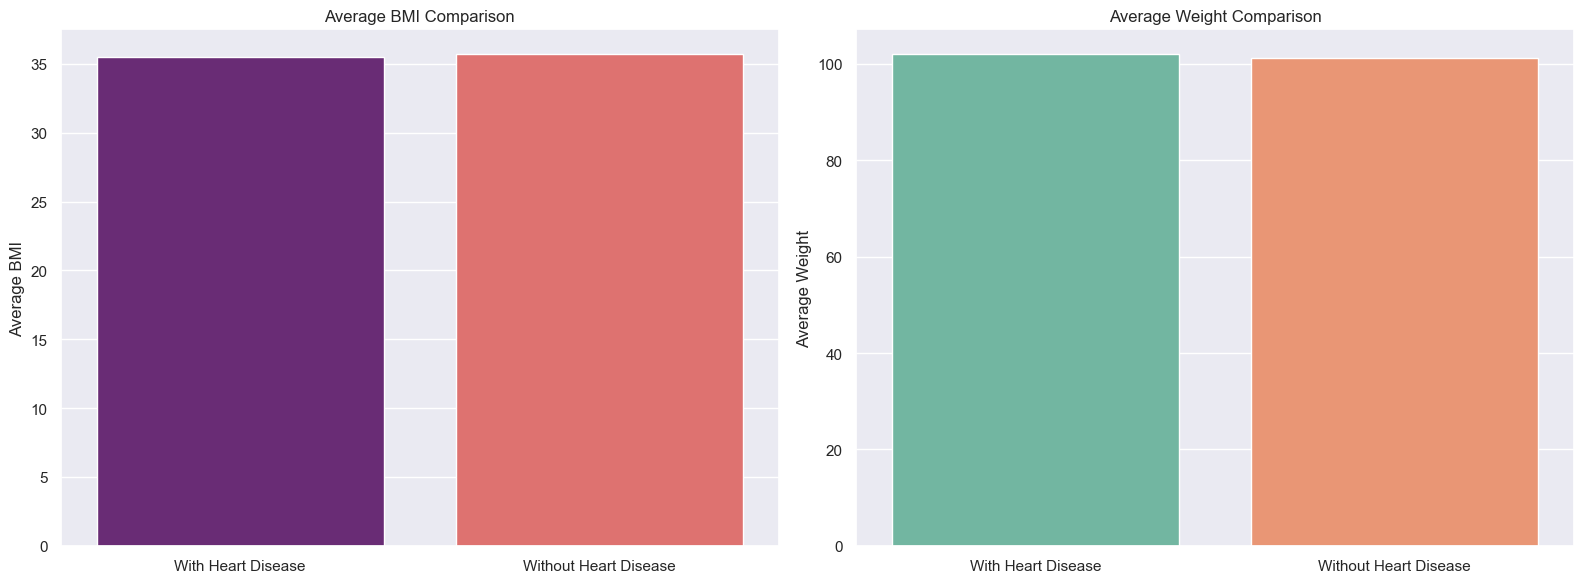

Average BMI for individuals with heart disease: 35.468503937007874
Average BMI for individuals without heart disease: 35.72195121951219
Average Weight for individuals with heart disease: 102.04527559055119
Average Weight for individuals without heart disease: 101.27804878048781


In [109]:
# Calculate average BMI for each group
avg_bmi_with_heart_disease = df[df['HeartDisease'] == 1]['BMI'].mean()
avg_bmi_without_heart_disease = df[df['HeartDisease'] == 0]['BMI'].mean()

# Calculate average weight for each group
avg_weight_with_heart_disease = df[df['HeartDisease'] == 1]['Weight'].mean()
avg_weight_without_heart_disease = df[df['HeartDisease'] == 0]['Weight'].mean()

# Set up subplots
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# Plot the bar chart for average BMI
sns.barplot(x=['With Heart Disease', 'Without Heart Disease'], y=[avg_bmi_with_heart_disease, avg_bmi_without_heart_disease], palette= "magma", ax=axes[0])
axes[0].set_title('Average BMI Comparison')
axes[0].set_ylabel('Average BMI')

# Plot the bar chart for average weight
sns.barplot(x=['With Heart Disease', 'Without Heart Disease'], y=[avg_weight_with_heart_disease, avg_weight_without_heart_disease], palette= sns.color_palette("Set2"), ax=axes[1])
axes[1].set_title('Average Weight Comparison')
axes[1].set_ylabel('Average Weight')

# Adjust layout
plt.tight_layout()

# Show the plots
plt.show()

print(f'Average BMI for individuals with heart disease: {avg_bmi_with_heart_disease}')
print(f'Average BMI for individuals without heart disease: {avg_bmi_without_heart_disease}')
print(f'Average Weight for individuals with heart disease: {avg_weight_with_heart_disease}')
print(f'Average Weight for individuals without heart disease: {avg_weight_without_heart_disease}')

# 5. Interactive Dashboards

Interactive Dashboard using Jupyter Widgets - BMI and Heart Disease

In [63]:
# Create dropdown widget for BMI categories
bmi_dropdown = widgets.Dropdown(
    options=df['Index_Cat'].unique(),
    value=df['Index_Cat'].unique()[0],
    description='Select BMI Category:'
)

# Create scatter plot function
def plot_scatter(bmi_category):
    plt.figure(figsize=(6, 2))
    sns.stripplot(x='Index_Cat', y='HeartDisease', data=df[df['Index_Cat'] == bmi_category], jitter=True, alpha=0.7)
    plt.xlabel('BMI Category')
    plt.ylabel('Heart Disease Status')
    plt.title(f'Scatter Plot: Heart Disease Status in {bmi_category} Category')
    plt.show()

# Define interactive widgets
interactive_plot = widgets.interactive(plot_scatter, bmi_category=bmi_dropdown)

# Display the interactive dashboard
display(interactive_plot)

interactive(children=(Dropdown(description='Select BMI Category:', options=('Obesity', 'Overweight', 'Extreme …

Interactive Dashboard using Jupyter Widgets - Weight and Heart Disease

In [120]:
# Create slider widget for weight
weight_slider = widgets.FloatSlider(
    value=df['Weight'].min(),
    min=df['Weight'].min(),
    max=df['Weight'].max(),
    step=1,
    description='Select Weight:'
)

# Create scatter plot function
def plot_scatter(weight):
    plt.figure(figsize=(6, 2))
    sns.stripplot(x='Weight', y='HeartDisease', data=df[df['Weight'] == weight], jitter=True, alpha=0.7)
    plt.xlabel('Weight')
    plt.ylabel('Heart Disease Status')
    plt.title(f'Scatter Plot: Heart Disease Status for Weight = {weight}')
    plt.show()

# Define interactive widgets
interactive_plot = widgets.interactive(plot_scatter, weight=weight_slider)

# Display the interactive dashboard
display(interactive_plot)

interactive(children=(FloatSlider(value=50.0, description='Select Weight:', max=160.0, min=50.0, step=1.0), Ou…

# 6. Conclusion

In [83]:
# Create a contingency table
contingency_table = pd.crosstab(df['Sex'], df['HeartDisease'])

# Perform the chi-square test
chi2, p, _, _ = chi2_contingency(contingency_table)

# Output the results
print(f'Chi-square statistic: {chi2}')
print(f'P-value: {p}')

# Interpret the results
alpha = 0.05
if p < alpha:
    print('There is a significant association between gender and heart disease.')
else:
    print('There is no significant association between gender and heart disease.')

Chi-square statistic: 84.14510134633775
P-value: 4.5976174508091635e-20
There is a significant association between gender and heart disease.


In [122]:
# Split the data into two groups based on heart failure status
heart_failure_group = df[df['HeartDisease'] == 1]['BMI']
no_heart_failure_group = df[df['HeartDisease'] == 0]['BMI']

# Perform the Mann-Whitney U test
statistic, p_value = mannwhitneyu(heart_failure_group, no_heart_failure_group)

# Output the results
print(f'Mann-Whitney U Statistic: {statistic}')
print(f'P-value: {p_value}')

# Interpret the results
alpha = 0.05
if p_value < alpha:
    print('The difference in BMI between individuals with and without heart failure is statistically significant.')
else:
    print('There is no statistically significant difference in BMI between individuals with and without heart disease.')

Mann-Whitney U Statistic: 102383.5
P-value: 0.6598742400360644
There is no statistically significant difference in BMI between individuals with and without heart disease.


In [75]:
# Split the data into two groups based on heart failure status
heart_failure_group = df[df['HeartDisease'] == 1]['Weight']
no_heart_failure_group = df[df['HeartDisease'] == 0]['Weight']

# Perform the Mann-Whitney U test
statistic, p_value = mannwhitneyu(heart_failure_group, no_heart_failure_group)

# Output the results
print(f'Mann-Whitney U Statistic: {statistic}')
print(f'P-value: {p_value}')

# Interpret the results
alpha = 0.05
if p_value < alpha:
    print('The difference in Weight between individuals with and without heart failure is statistically significant.')
else:
    print('There is no statistically significant difference in Weight between individuals with and without heart failure.')

Mann-Whitney U Statistic: 105383.5
P-value: 0.7554515557365917
There is no statistically significant difference in Weight between individuals with and without heart failure.
